<a href="https://colab.research.google.com/github/nitinlodhi019/Deep-Learning/blob/main/Perceptron/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Perceptron?**

https://playground.tensorflow.org/

The Perceptron is one of the simplest artificial neural network architectures, introduced by Frank Rosenblatt in 1957. It is primarily used for binary classification.

*It can solve linear or sort of linear dataset.*

Perceptron is a type of neural network that performs binary classification that maps input features to an output decision, usually classifying data into one of two categories, such as 0 or 1.

Perceptron consists of a single layer of input nodes that are fully connected to a layer of output nodes. It is particularly good at learning linearly separable patterns. It utilizes a variation of artificial neurons called Threshold Logic Units (TLU).

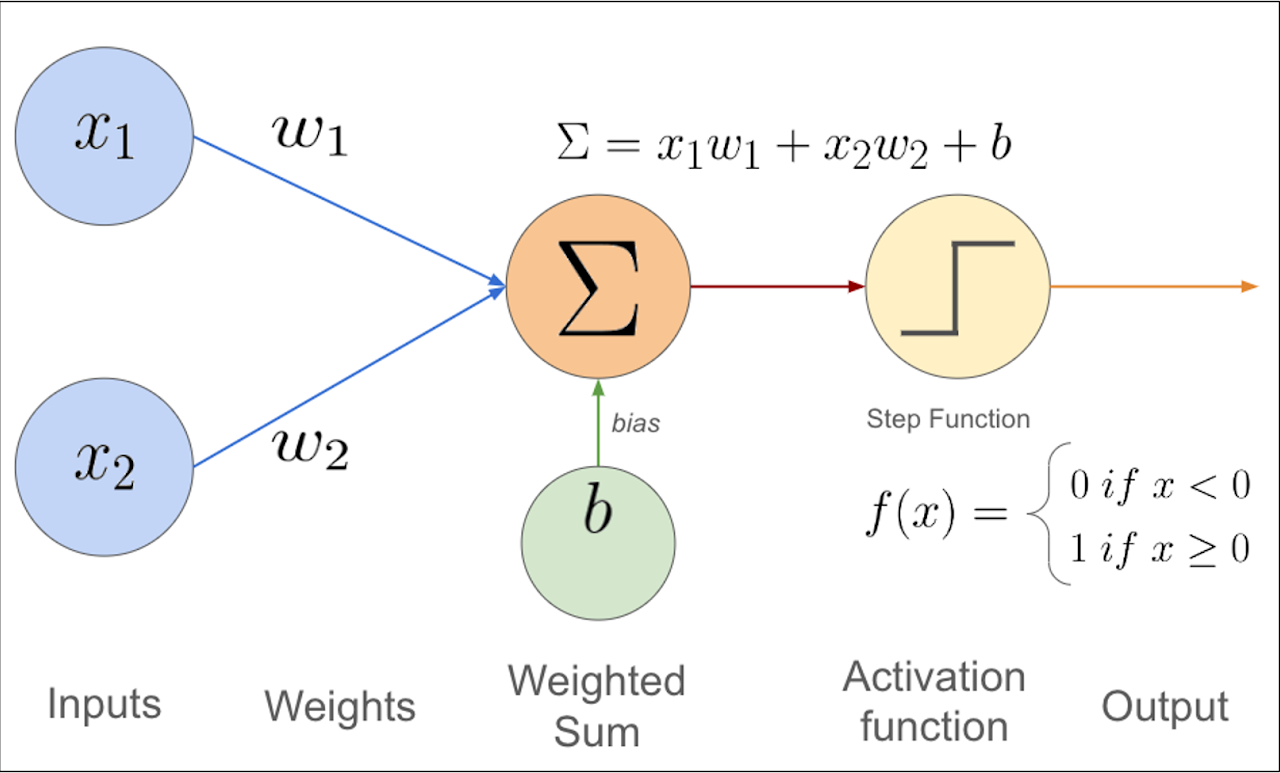

The weighted sum is computed as:

z
=
w
1
x
1
+
w
2
x
2
+
…
+
w
n
x
n
=
X
T
W
z=w
1
​
 x
1
​
 +w
2
​
 x
2
​
 +…+w
n
​
 x
n
​
 =X
T
 W

**The step function** compares this weighted sum to a threshold. If the input is larger than the threshold value, the output is 1; otherwise, it’s 0. This is the most common activation function used in Perceptrons are represented by the Heaviside step function:

h
(
z
)
=
{
0
if
z
<
Threshold
1
if
z
≥
Threshold
h(z)={
0
1
​
  
if z<Threshold
if z≥Threshold
​




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/placement-dataset.csv')
data.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [ ]:
data.drop(columns=['city'], inplace=True)
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


<Axes: xlabel='cgpa', ylabel='iq'>

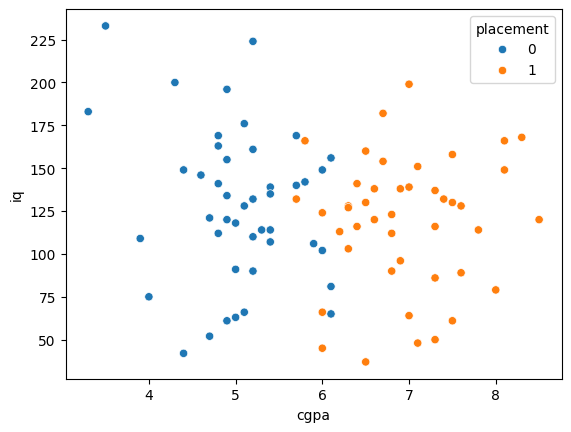

In [ ]:
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=data)


In [ ]:
X = data.iloc[:, 0:2]
y = data.iloc[:, -1]

In [ ]:
X = X.dropna()
y = y[X.index]


In [ ]:
print(X.shape)
y.shape

(88, 2)


(88,)

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X, y)

Perceptron()

In [ ]:
# weights
p.coef_

array([[327.7, -39. ]])

In [ ]:
# bias
p.intercept_

array([10.])

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


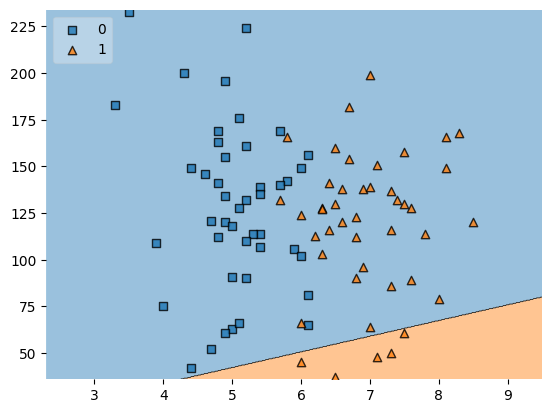

In [ ]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)
plt.show()

#Perceptron Trick
How to train perceptron

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [ ]:
import matplotlib.pyplot as plt

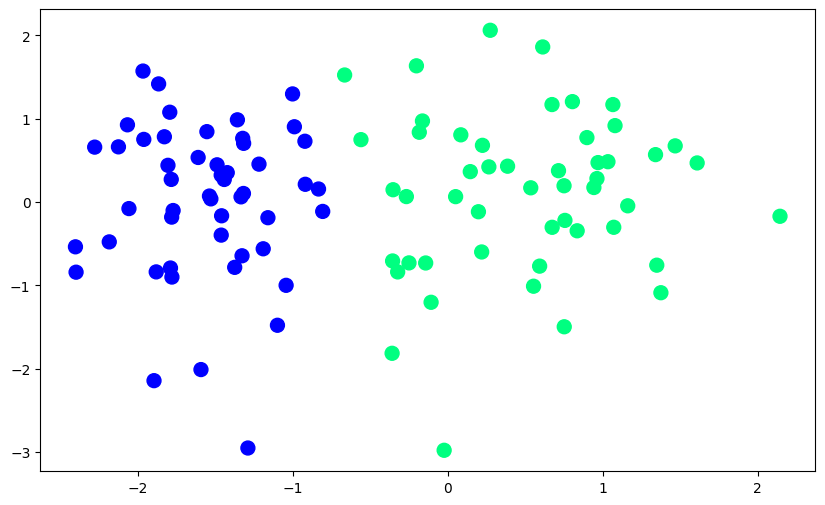

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]


In [ ]:
def step(z):
    return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
print(coef_)
print(intercept_)


[1.34561007 0.20554249]
0.9


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

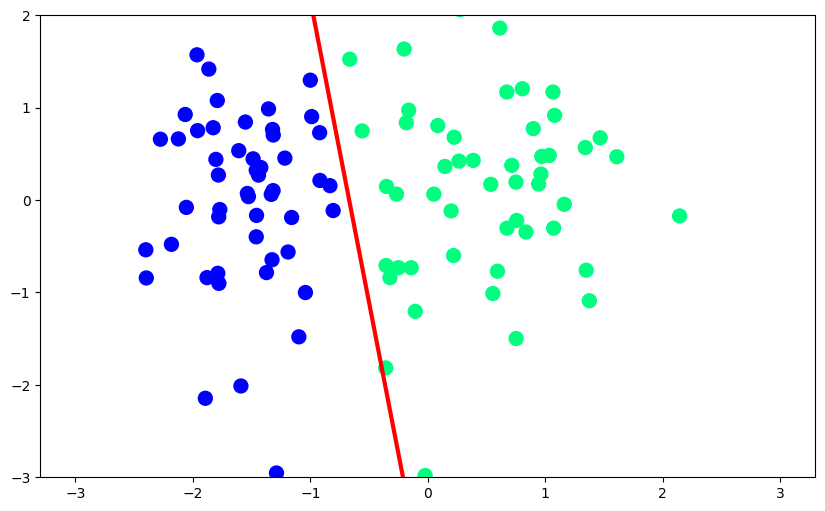

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


Perceptron Loss function

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

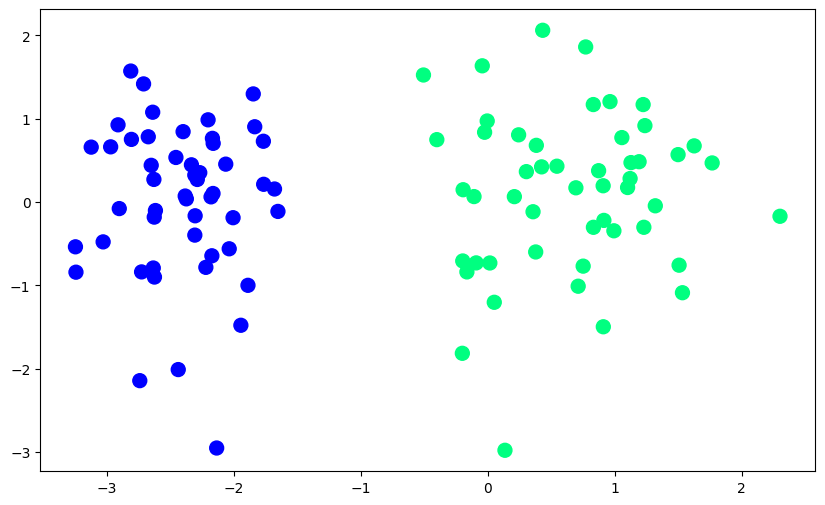

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
def perceptron(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b


In [ ]:
w1,w2,b = perceptron(X,y)


In [ ]:
b

1.3000000000000003

In [ ]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

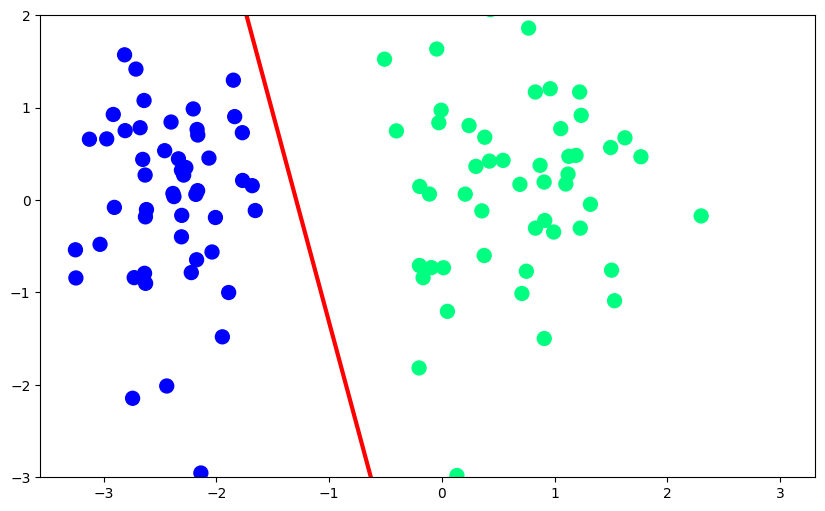

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#Problem with Perceptron
it can solve only linear binary classification


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [ ]:
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

In [ ]:
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

In [ ]:
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [ ]:
or_data

,input1,input2,ouput
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

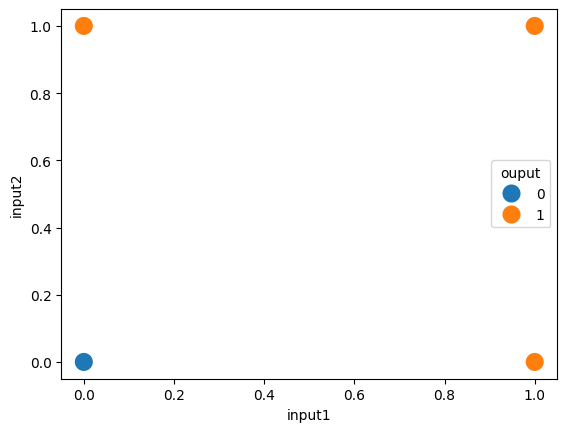

In [ ]:
sns.scatterplot(x = or_data['input1'], y = or_data['input2'],hue=or_data['ouput'],s=200)

In [ ]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

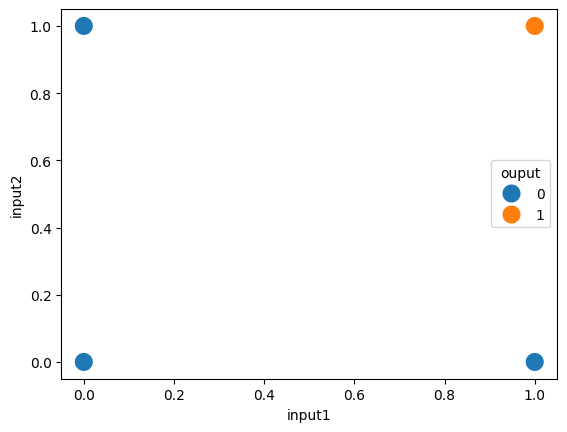

In [ ]:
sns.scatterplot(x = and_data['input1'], y = and_data['input2'],hue=and_data['ouput'],s=200)

In [ ]:
xor_data

,input1,input2,ouput
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

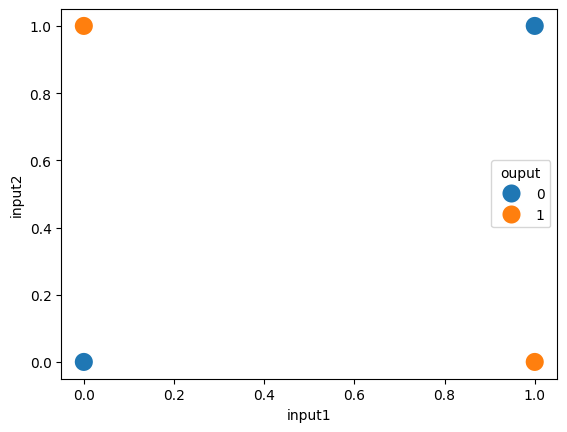

In [ ]:
sns.scatterplot(x = xor_data['input1'], y = xor_data['input2'],hue=xor_data['ouput'],s=200)

In [ ]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [ ]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [ ]:
clf1.coef_

array([[2., 2.]])

In [ ]:
clf1.intercept_

array([-2.])

In [ ]:
x=np.linspace(-1,1,5)
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

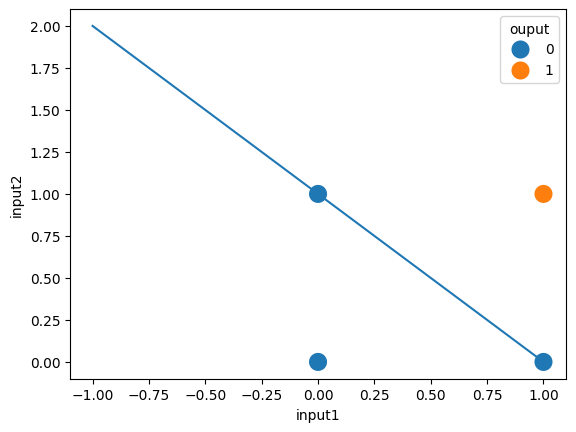

In [ ]:
plt.plot(x,y)
sns.scatterplot(x = and_data['input1'], y = and_data['input2'],hue=and_data['ouput'],s=200)

In [ ]:
clf2.coef_

array([[2., 2.]])

In [ ]:
clf2.intercept_

array([-1.])

In [ ]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<Axes: xlabel='input1', ylabel='input2'>

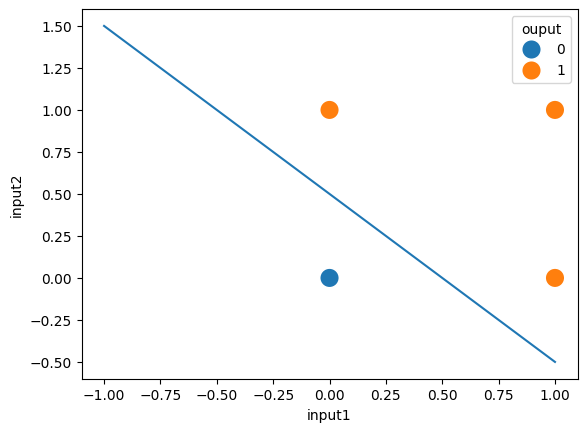

In [ ]:
plt.plot(x1,y1)
sns.scatterplot(x = or_data['input1'],y = or_data['input2'],hue=or_data['ouput'],s=200)

In [ ]:
clf3.coef_

array([[0., 0.]])

In [ ]:
clf3.intercept_

array([0.])

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

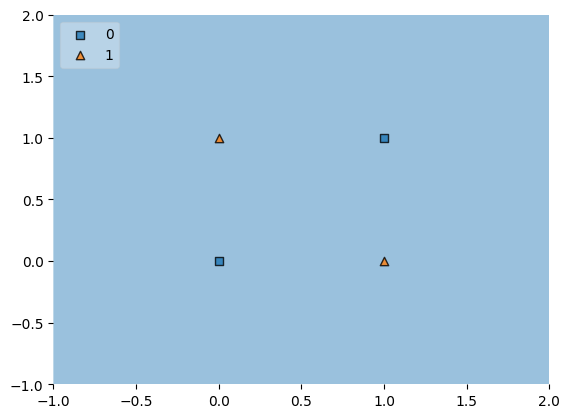

In [ ]:
plot_decision_regions(xor_data.iloc[:, 0:2].values, xor_data.iloc[:, -1].values, clf=clf3, legend=2)
